In [1]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\Alex\\machine-learning\\word2vec_gensim")
os.getcwd()

'C:\\Users\\Alex\\machine-learning\\word2vec_gensim'

In [3]:
df = pd.read_csv('simpsons_dataset.csv')
df.shape

(158314, 2)

In [4]:
df[:30]

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
5,Martin Prince,I don't think there's anything left to say.
6,Edna Krabappel-Flanders,Bart?
7,Bart Simpson,Victory party under the slide!
8,NaN,NaN
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!


In [5]:
df.isnull().sum()

raw_character_text    17814
spoken_words          26459
dtype: int64

In [6]:
print(f'df[:30] = {df[:30]}')
df = df.dropna().reset_index(drop=True)
df.isnull().sum()
print(f'df[:30] = {df[:30]}')

df[:30] =          raw_character_text                                       spoken_words
0               Miss Hoover  No, actually, it was a little of both. Sometim...
1              Lisa Simpson                             Where's Mr. Bergstrom?
2               Miss Hoover  I don't know. Although I'd sure like to talk t...
3              Lisa Simpson                         That life is worth living.
4   Edna Krabappel-Flanders  The polls will be open from now until the end ...
5             Martin Prince        I don't think there's anything left to say.
6   Edna Krabappel-Flanders                                              Bart?
7              Bart Simpson                     Victory party under the slide!
8                       NaN                                                NaN
9              Lisa Simpson                      Mr. Bergstrom! Mr. Bergstrom!
10                 Landlady  Hey, hey, he Moved out this morning. He must h...
11             Lisa Simpson               

In [7]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

# Fixed problem with 'en'.   Anaconda Powershell has an admin option upon right click
# Helpful SO answer: 
# https://stackoverflow.com/questions/54334304
# /spacy-cant-find-model-en-core-web-sm-on-windows-10-and-python-3-5-3-anacon
# python -m spacy download en 

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [8]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words'])

In [9]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.94 mins


In [10]:
df_clean = pd.DataFrame({'clean': txt})
print(df_clean[:30])
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape
df_clean[:30]

                                                clean
0   actually little disease magazine news show be ...
1                                     be mr bergstrom
2   not know would sure like talk not touch lesson...
3                                     life worth live
4   poll open end recess case decide thought will ...
5                                  not think be leave
6                                                None
7                                 victory party slide
8                           mr bergstrom mr bergstrom
9   hey hey move morning new job take copernicus c...
10                                               None
11                   think be take train capital city
12       train like traditional environmentally sound
13  yes be backbone country leland stanford drive ...
14                                               None
15                                 hey thank vote man
16                            not vote voting 's geek
17                          

,clean
0,actually little disease magazine news show be ...
1,be mr bergstrom
2,not know would sure like talk not touch lesson...
3,life worth live
4,poll open end recess case decide thought will ...
5,not think be leave
7,victory party slide
8,mr bergstrom mr bergstrom
9,hey hey move morning new job take copernicus c...
11,think be take train capital city


In [11]:
#  Pick up at Bigrams: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial/notebook?scriptVersionId=6660075&cellId=23

from gensim.models.phrases import Phrases, Phraser

In [12]:
sent = [row.split() for row in df_clean['clean']]

In [13]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

INFO - 15:30:25: collecting all words and their counts
INFO - 15:30:25: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 15:30:25: PROGRESS: at sentence #10000, processed 67396 words and 50551 word types
INFO - 15:30:25: PROGRESS: at sentence #20000, processed 140465 words and 95808 word types
INFO - 15:30:25: PROGRESS: at sentence #30000, processed 207950 words and 132011 word types
INFO - 15:30:25: PROGRESS: at sentence #40000, processed 270207 words and 164407 word types
INFO - 15:30:25: PROGRESS: at sentence #50000, processed 334085 words and 196195 word types
INFO - 15:30:25: PROGRESS: at sentence #60000, processed 400877 words and 228659 word types
INFO - 15:30:25: PROGRESS: at sentence #70000, processed 467802 words and 260712 word types
INFO - 15:30:26: PROGRESS: at sentence #80000, processed 534361 words and 292095 word types
INFO - 15:30:26: PROGRESS: at sentence #90000, processed 602037 words and 321944 word types
INFO - 15:30:26: collected 328658 token ty

In [14]:
bigram = Phraser(phrases)

INFO - 15:30:26: exporting phrases from Phrases<328658 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 15:30:26: FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<127 phrases, min_count=30, threshold=10.0> from Phrases<328658 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000> in 0.51s', 'datetime': '2021-06-20T15:30:26.684905', 'gensim': '4.0.1', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [15]:
sentences = bigram[sent]


In [16]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

29673

In [17]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['be', 'not', 'oh', 'will', 'like', "'s", 'know', 'think', 'hey', 'good']

In [18]:
import multiprocessing

from gensim.models import Word2Vec

In [19]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
print(cores)

8


In [20]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300, # key word has change from size to vector_size
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

INFO - 15:30:27: Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=300, alpha=0.03)', 'datetime': '2021-06-20T15:30:27.370040', 'gensim': '4.0.1', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [21]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 15:30:27: collecting all words and their counts
INFO - 15:30:27: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 15:30:27: PROGRESS: at sentence #10000, processed 65193 words, keeping 9096 word types
INFO - 15:30:27: PROGRESS: at sentence #20000, processed 136024 words, keeping 13916 word types
INFO - 15:30:27: PROGRESS: at sentence #30000, processed 201577 words, keeping 16865 word types
INFO - 15:30:27: PROGRESS: at sentence #40000, processed 262082 words, keeping 19506 word types
INFO - 15:30:27: PROGRESS: at sentence #50000, processed 324069 words, keeping 21758 word types
INFO - 15:30:27: PROGRESS: at sentence #60000, processed 388895 words, keeping 23910 word types
INFO - 15:30:27: PROGRESS: at sentence #70000, processed 454042 words, keeping 25876 word types
INFO - 15:30:27: PROGRESS: at sentence #80000, processed 518929 words, keeping 27769 word types
INFO - 15:30:28: PROGRESS: at sentence #90000, processed 584755 words, keeping 29345 word types


Time to build vocab: 0.01 mins


In [22]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 15:30:28: Word2Vec lifecycle event {'msg': 'training model with 7 workers on 3375 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2', 'datetime': '2021-06-20T15:30:28.143793', 'gensim': '4.0.1', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'train'}
INFO - 15:30:28: worker thread finished; awaiting finish of 6 more threads
INFO - 15:30:28: worker thread finished; awaiting finish of 5 more threads
INFO - 15:30:28: worker thread finished; awaiting finish of 4 more threads
INFO - 15:30:28: worker thread finished; awaiting finish of 3 more threads
INFO - 15:30:28: worker thread finished; awaiting finish of 2 more threads
INFO - 15:30:28: worker thread finished; awaiting finish of 1 more threads
INFO - 15:30:28: worker thread finished; awaiting finish of 0 more threads
INFO - 15:30:28: EPOCH - 1 : training on 601119 raw words (219268 effective words) took 0.8s, 267287 effe

INFO - 15:30:39: worker thread finished; awaiting finish of 6 more threads
INFO - 15:30:39: worker thread finished; awaiting finish of 5 more threads
INFO - 15:30:39: worker thread finished; awaiting finish of 4 more threads
INFO - 15:30:39: worker thread finished; awaiting finish of 3 more threads
INFO - 15:30:39: worker thread finished; awaiting finish of 2 more threads
INFO - 15:30:39: worker thread finished; awaiting finish of 1 more threads
INFO - 15:30:39: worker thread finished; awaiting finish of 0 more threads
INFO - 15:30:39: EPOCH - 13 : training on 601119 raw words (218776 effective words) took 0.9s, 233085 effective words/s
INFO - 15:30:40: worker thread finished; awaiting finish of 6 more threads
INFO - 15:30:40: worker thread finished; awaiting finish of 5 more threads
INFO - 15:30:40: EPOCH 14 - PROGRESS: at 93.60% examples, 203931 words/s, in_qsize 3, out_qsize 3
INFO - 15:30:40: worker thread finished; awaiting finish of 4 more threads
INFO - 15:30:40: worker thread f

INFO - 15:30:51: EPOCH - 24 : training on 601119 raw words (219052 effective words) took 0.9s, 243277 effective words/s
INFO - 15:30:52: worker thread finished; awaiting finish of 6 more threads
INFO - 15:30:52: worker thread finished; awaiting finish of 5 more threads
INFO - 15:30:52: worker thread finished; awaiting finish of 4 more threads
INFO - 15:30:52: worker thread finished; awaiting finish of 3 more threads
INFO - 15:30:52: worker thread finished; awaiting finish of 2 more threads
INFO - 15:30:52: worker thread finished; awaiting finish of 1 more threads
INFO - 15:30:52: worker thread finished; awaiting finish of 0 more threads
INFO - 15:30:52: EPOCH - 25 : training on 601119 raw words (219575 effective words) took 1.0s, 226625 effective words/s
INFO - 15:30:53: worker thread finished; awaiting finish of 6 more threads
INFO - 15:30:53: worker thread finished; awaiting finish of 5 more threads
INFO - 15:30:53: worker thread finished; awaiting finish of 4 more threads
INFO - 15:

Time to train the model: 0.48 mins


In [23]:
w2v_model.wv.most_similar(positive=["homer"])

[('marge', 0.6660357713699341),
 ('depressed', 0.6204881072044373),
 ('becky', 0.5985729694366455),
 ("tryin_'", 0.5985531210899353),
 ('hammock', 0.5911051034927368),
 ('adopt', 0.588822603225708),
 ('snuggle', 0.5874436497688293),
 ('herb', 0.5802744030952454),
 ('abe', 0.5778324604034424),
 ('embarrassing', 0.5742378830909729)]

In [24]:
w2v_model.wv.most_similar(positive=["homer_simpson"])

[('client', 0.6393007636070251),
 ('pleased', 0.6366333365440369),
 ('recent', 0.6263326406478882),
 ('montgomery_burn', 0.6017772555351257),
 ('appearance', 0.595643937587738),
 ('kidnap', 0.5955327749252319),
 ('display', 0.5947876572608948),
 ('governor', 0.5875977873802185),
 ('versus', 0.5872914791107178),
 ('select', 0.5824985504150391)]

In [25]:
w2v_model.wv.most_similar(positive=["marge"])

[('homer', 0.6660358309745789),
 ('becky', 0.6511843204498291),
 ('grownup', 0.6235828399658203),
 ('raccoon', 0.6170586943626404),
 ('homie', 0.6127768158912659),
 ('depressed', 0.6046934127807617),
 ('embarrassing', 0.6006236672401428),
 ('anyhoo', 0.5934889912605286),
 ('badly', 0.5927162766456604),
 ('attract', 0.591194748878479)]

In [26]:
w2v_model.wv.most_similar(positive=["clown"])

[('pathetic', 0.5720959901809692),
 ('jewish', 0.5588107705116272),
 ('reference', 0.49125516414642334),
 ('college', 0.4842357039451599),
 ('tragic', 0.4705577790737152),
 ('world', 0.46986788511276245),
 ('responsibility', 0.45987263321876526),
 ('adventure', 0.45812374353408813),
 ('legend', 0.449354350566864),
 ('hee', 0.44756823778152466)]

In [27]:
w2v_model.wv.most_similar(positive=["bart"])

[('lisa', 0.7631731033325195),
 ('mom_dad', 0.6726722121238708),
 ('ralphie', 0.6695364117622375),
 ('substitute', 0.6558251976966858),
 ('dr_hibbert', 0.6523398160934448),
 ('mom', 0.6504871249198914),
 ('hearing', 0.6435617804527283),
 ('homework', 0.6316744089126587),
 ('maggie', 0.6309219002723694),
 ('janey', 0.6305357217788696)]

In [28]:
w2v_model.wv.most_similar(positive=["love"])

[('ashamed', 0.5797131061553955),
 ('opposite', 0.5697283148765564),
 ('god_bless', 0.5680715441703796),
 ('bitter', 0.5636813044548035),
 ('noble', 0.5542813539505005),
 ('relationship', 0.552810788154602),
 ('wonderful', 0.5508057475090027),
 ('awww', 0.5503503680229187),
 ('ireland', 0.549735426902771),
 ('dictionary', 0.549280047416687)]

In [29]:
w2v_model.wv.most_similar(positive=["dumb"])

[('bald', 0.6194189786911011),
 ('selfish', 0.5968685150146484),
 ('moron', 0.588007390499115),
 ('becky', 0.5591166615486145),
 ('insult', 0.5556935667991638),
 ('creepy', 0.5550668835639954),
 ('duh', 0.5515678524971008),
 ('obvious', 0.5451082587242126),
 ('script', 0.5451017022132874),
 ('nervous', 0.5397663712501526)]

In [30]:
w2v_model.wv.most_similar(positive=["duh"])

[('jeez', 0.7250043749809265),
 ('puppet', 0.693875789642334),
 ('gotcha', 0.6916921734809875),
 ('hopeless', 0.6852737069129944),
 ('gee', 0.6830611228942871),
 ('bongo', 0.6741742491722107),
 ('umm', 0.6724241971969604),
 ('dunno', 0.6699246168136597),
 ('backup', 0.6594211459159851),
 ('creepy', 0.6543980836868286)]

In [31]:
w2v_model.wv.most_similar(positive=["willie"])

[('groundskeeper', 0.899416983127594),
 ('puke', 0.5647397041320801),
 ('aye', 0.4818291962146759),
 ('ach', 0.47970080375671387),
 ('mop', 0.46713370084762573),
 ('fence', 0.4642358124256134),
 ('proper', 0.46160411834716797),
 ('lounge', 0.4556407332420349),
 ('field', 0.45374414324760437),
 ('disappear', 0.45183536410331726)]

In [32]:
w2v_model.wv.most_similar(positive=["haunt"])

[('rest_life', 0.7814347147941589),
 ('juliet', 0.6748186945915222),
 ('adopt', 0.6569067239761353),
 ('ghost', 0.6564218401908875),
 ('anyhoo', 0.6468220353126526),
 ('snuggle', 0.6220044493675232),
 ('awake', 0.6199387907981873),
 ('sweetheart', 0.619727373123169),
 ('embarrassing', 0.618976354598999),
 ('someplace', 0.6156415343284607)]

In [33]:
w2v_model.wv.most_similar(positive=["sax"])

[('steve', 0.7940543293952942),
 ("talkin_'", 0.6157407164573669),
 ('jerry', 0.6136488914489746),
 ('beatle', 0.6064109206199646),
 ('lewi', 0.6053235530853271),
 ('imaginary', 0.6004195213317871),
 ('etc', 0.5662745237350464),
 ('player', 0.5653820633888245),
 ('backup', 0.5648350715637207),
 ('manager', 0.5644633173942566)]

In [34]:
w2v_model.wv.most_similar(positive=["music"])

[('popular', 0.5719140768051147),
 ('poetry', 0.5419637560844421),
 ('band', 0.5373952388763428),
 ('jazz', 0.5351808667182922),
 ('rock', 0.5339167714118958),
 ('beatle', 0.5225553512573242),
 ('art', 0.5167068243026733),
 ('festival', 0.5146817564964294),
 ('poster', 0.5117003917694092),
 ('singer', 0.5084192156791687)]

In [35]:
w2v_model.wv.similarity("moe_'s", 'tavern')

0.8951387

In [36]:
character_list = ['lisa', 'maggie', 'marge', 'bart', 'homer']
for char1 in character_list:
    for char2 in character_list:
        if char1 != char2:
            print(f'w2v_model.wv.similarity({char1}, {char2}) = {w2v_model.wv.similarity(char1, char2)}')

w2v_model.wv.similarity(lisa, maggie) = 0.6507840752601624
w2v_model.wv.similarity(lisa, marge) = 0.4713343381881714
w2v_model.wv.similarity(lisa, bart) = 0.7631731033325195
w2v_model.wv.similarity(lisa, homer) = 0.3566074073314667
w2v_model.wv.similarity(maggie, lisa) = 0.6507840752601624
w2v_model.wv.similarity(maggie, marge) = 0.38483768701553345
w2v_model.wv.similarity(maggie, bart) = 0.6309219598770142
w2v_model.wv.similarity(maggie, homer) = 0.3585813045501709
w2v_model.wv.similarity(marge, lisa) = 0.4713343381881714
w2v_model.wv.similarity(marge, maggie) = 0.38483768701553345
w2v_model.wv.similarity(marge, bart) = 0.4858154058456421
w2v_model.wv.similarity(marge, homer) = 0.6660358309745789
w2v_model.wv.similarity(bart, lisa) = 0.7631731033325195
w2v_model.wv.similarity(bart, maggie) = 0.6309219598770142
w2v_model.wv.similarity(bart, marge) = 0.4858154058456421
w2v_model.wv.similarity(bart, homer) = 0.46574634313583374
w2v_model.wv.similarity(homer, lisa) = 0.3566074073314667
w2

In [37]:
w2v_model.wv.similarity('maggie', 'baby')

0.64195144

In [38]:
w2v_model.wv.similarity('maggie', 'boy')

0.47601068

In [39]:
w2v_model.wv.similarity('maggie', 'girl')

0.3199433

In [40]:
for char in character_list:
    print(char, w2v_model.wv.similarity(char, 'child'))

lisa 0.45351204
maggie 0.35660183
marge 0.25462943
bart 0.45706153
homer 0.24636379


In [41]:
for char in character_list:
    print(char, w2v_model.wv.similarity(char, 'baby'))

lisa 0.30860278
maggie 0.64195144
marge 0.32526255
bart 0.2976489
homer 0.2858795


In [42]:
w2v_model.wv.similarity('bart', 'nelson')

0.492817

In [43]:
w2v_model.wv.doesnt_match(['lisa', 'bart', 'homer'])

'homer'

In [44]:
w2v_model.wv.doesnt_match(['marge', 'bart', 'homer'])

'bart'

In [45]:
w2v_model.wv.doesnt_match(['homer', 'patty', 'selma'])

'homer'

In [46]:
w2v_model.wv.doesnt_match(['homer', 'dumb', 'smart'])

'homer'

In [47]:
w2v_model.wv.doesnt_match(['homer', 'donut', 'duh'])

'donut'

In [48]:
# Analogies
w2v_model.wv.most_similar(positive=["woman", "homer"], negative=["marge"], topn=3)

[('dancer', 0.5069513320922852),
 ('wife', 0.4780435264110565),
 ('admire', 0.4706101417541504)]

In [49]:
w2v_model.wv.most_similar(positive=["woman", "bart"], negative=["man"], topn=3)

[('lisa', 0.6558153629302979),
 ('pregnant', 0.5728266835212708),
 ('dr_hibbert', 0.5695217251777649)]

In [55]:
# Start with t-SNE visualizations
# https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial/notebook?scriptVersionId=6660075&cellId=75
# Here we will explore PCA.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [75]:
# Code inspired by:
# https://aneesha.medium.com/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """

    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

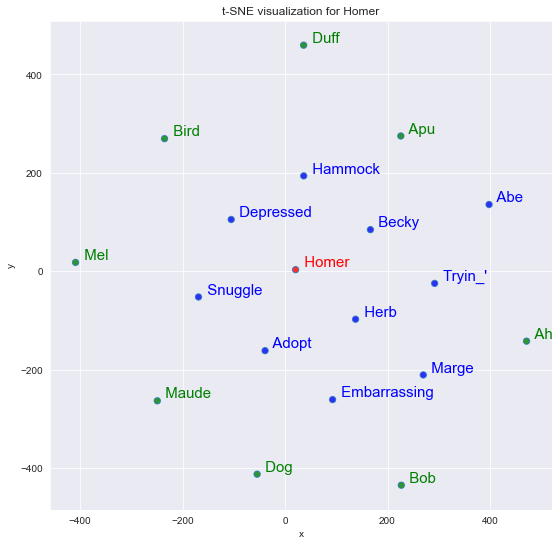

In [71]:
tsnescatterplot(w2v_model, 'homer', ['dog', 'bird', 'ah', 'maude', 'bob', 'mel', 'apu', 'duff'])

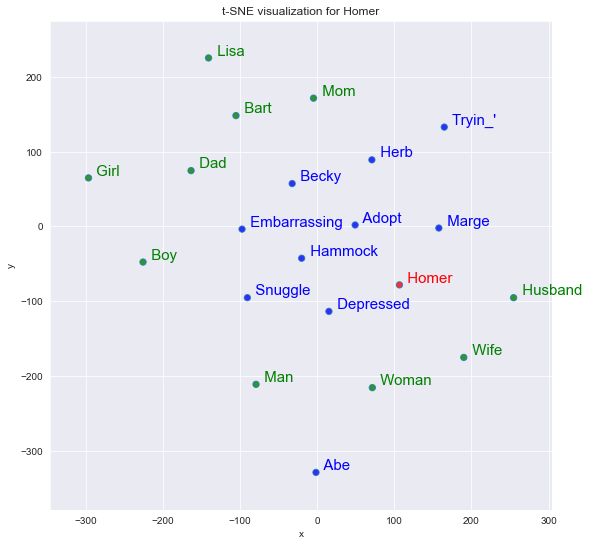

In [86]:
tsnescatterplot(w2v_model, 'homer', ['lisa','bart', 'boy','man', 'woman', 'dad', 'husband', 'wife', 'mom', 'girl'])


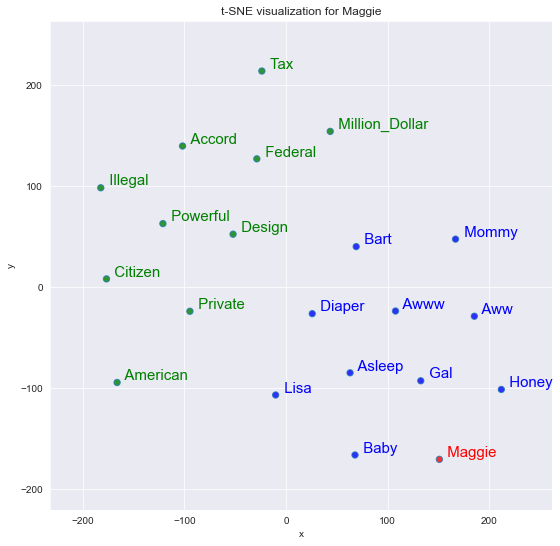

In [72]:
tsnescatterplot(w2v_model, 'maggie', [i[0] for i in w2v_model.wv.most_similar(negative=["maggie"])])

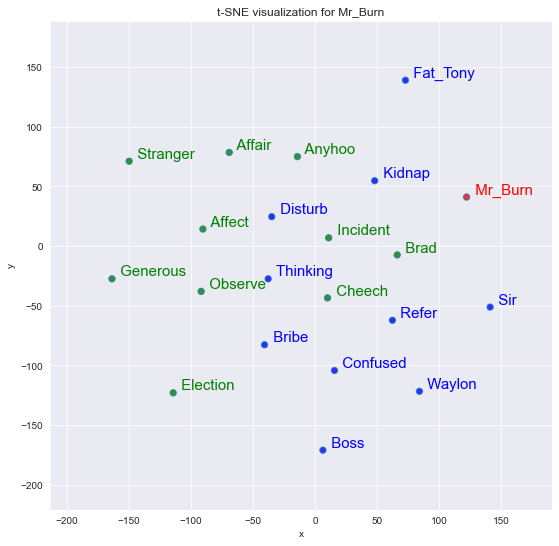

In [73]:
tsnescatterplot(w2v_model, "mr_burn", [t[0] for t in w2v_model.wv.most_similar(positive=["mr_burn"], topn=20)][10:])